<a href="https://colab.research.google.com/github/JuneWayne/DS3021-Wrangling/blob/main/assignment/Ethan_Cao_Wrangling_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
- <font color="lightgreen">This paper is about researching for an effective and easy way to conduct data cleaning. To create a framework of data cleaning that makes all datasets easy to work with.</font>

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
- <font color="lightgreen">The 'tidy data standard' is intended to serve the purpose of making data cleaning more efficient, such as reducing redundant efforts and simplifying initial exploration when data is converted to a rather predicatble structure. It is also to enhance the compatibility between data analysis tools with the cleaned data set, as it eliminates the need for constant data reshaping. It also makes it easy for different software to communicate seamlessly. This overall allows analysts to focus on insights rather than the logistics of resolving technical details in reshaping and restructuring. </font>
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
- <font color="lightgreen">The first sentence is likely referring to the idea that Tidy datasets follow a consistent structure, while messy datasets can be disorganized in countless different ways, there's no standardized formula on how messy a dataset can be. The second sentence is referring to the idea that when looking at a specific dataset, it's usually clear what counts as a variable and what counts as an observation. But it is tricky to define them across all disciplines with a generalized definition. Such as one row in a medical dataset represents a patient, but in a time series dataset, each row might represent a daily measurement for one patient.</font>
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
- <font color="lightgreen">Values are defined as a collection of values in a dataset, which could be quantitative numberes or qualitative strings. such as heigh, weight vs names, categories. Variables are defined as something that contains values that measure the same attribute, such as temperature, where each column in a dataset is represented as one variable. Observations are defined as all values measured on the same unit across multiple features, which can be interpreted as the rows in a dataset.</font>
  5. How is "Tidy Data" defined in section 2.3?
- <font color="lightgreen">Tidy data is defined as a standardized way of structuring datasets, specifically, each variable forms a column, each observation forms a row, and each type of observational unit forms a table </font>
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
- <font color="lightgreen">1. Column headers are values, not variable names, instead of having meaningful variable names, people chose data values to represent column headers. 2. Multiple variables are stored in one column, such as Height_Weight stored together instead of separate columns. 3. Variables are stored in both rows and columns, such as a dataset measuring different months appear as column headers instead of values in a Month column. 4. Multiple types of observational units are stored in the same table, where one table mixes different types of data, which should be split into separate tables. Table 4 is messy becuase its column headers are values, not variable names, it doesn't follow the tidy data structure, with incoe elvels being spread across multiple columns. Its also difficult to extract variables as to get all data related to income, one must manually select multiple columns instead of just one. Melting a dataset is the process of transforming wide-format data into a long-format structure by turning column headers into values.  </font>
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
- <font color="lightgreen">Table 11 is messy because column headers are values, not variable names. Variables are stored in both rows and columns, and there are many missing (null) values in the dataset. Table 12 is molten because the day columns have been melted into a date column. Moreover, the element column has been spread into two separate columns: tmax and tmin, and each row now represents a single day's observation, which follows the tidy data standard.</font>
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
- <font color="lightgreen">the author describes a chicken-and-egg problem in relation to tidy data because titdy data is only useful if there are tools that work well with it. Such as ggplot2, dplyr, and tidyverse. If analysts are alrady using messy data formats, developing new tidy tools won't help unless people adopt tidy data structures. The author's hopes for the future of data wrangling is that he hopes that there will be incremental improvements in tidy tools and data structures. Also he hopes that there will be alternative formulations of tidiness, such as some datasets will be using multidimensional arrays rather than tables, followed by tools that can support both array-tidy and dataframe tidy formats. Next, he hopes that using user-testing and cognitive research to design better tools for data wrangling. Moreover, he wish to expand beyond tidying to other data cleaning challenges, such as having new frameworks to be developed to standardize and simplify the tasks of data cleaning.  </font>

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
# 1.
import pandas as pd
df = pd.read_csv('airbnb_hw.csv')
# check for unique values in price
df['Price'].unique()
# check for null values, apparantly there are none
df['Price'].isnull().sum()
df['Price'].isnull().value_counts()
# check for nans, it returns a false
df['Price'].hasnans
# check for data type of price
df['Price'].dtypes
# it seems like the price column is an object, remove any potential spaces or symbols that might have made it a string
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].str.replace(' ', '')
df['Price'] = df['Price'].astype(float)
# check type of price again, now it should be float
df['Price'].dtypes
df['Price'].isnull().sum()

0

In [20]:
# 2
# cross-tabulation of the un-cleaned subject_injury with force_type
df5 = pd.read_csv('mn_police_use_of_force.csv')
pd.crosstab(df5['force_type'], df5['subject_injury'])

subject_injury,No,Yes
force_type,,
Baton,0,2
Bodily Force,1093,1286
Chemical Irritant,131,41
Firearm,2,0
Gun Point Display,33,44
Improvised Weapon,34,40
Less Lethal Projectile,1,2
Police K9 Bite,2,44
Taser,150,172


In [23]:
# 2
import pandas as pd
import numpy as np
df2 = pd.read_csv('mn_police_use_of_force.csv')
# check for unique values in subject_injury
df2['subject_injury'].value_counts()
# check null values in subject_injury, there are 9848 null values
df2['subject_injury'].isnull().sum()
# check the force type to determine whether the person might have been injured or not (Could be a subjective benchmark)
injury_type = ['Firearm', 'Baton', 'Taser','Police K9 Bite', 'Less Lethal Projectile', 'Less Lethal','Improvised Weapon']
# replace each null value with yes or no based on possibility of injury
df2['subject_injury'] = df2['subject_injury'].fillna(df2['force_type'].isin(injury_type).map({True: 'Yes', False: 'No'}))
# Now there are no null values, with 10189 cases of no injury records and 2736 cases of injury records
df2['subject_injury'].value_counts()
# cross tabulate subject_injury with force_type
pd.crosstab(df2['force_type'], df2['subject_injury'],margins=True)
# the crosstab shows a significant increase in the injuries and non-injuries as missing values are converted into Yes or No values


subject_injury,No,Yes,All
force_type,,,
Baton,0,4,4
Bodily Force,8144,1286,9430
Chemical Irritant,1552,41,1593
Firearm,2,0,2
Gun Point Display,60,44,104
Improvised Weapon,34,114,148
Less Lethal,0,87,87
Less Lethal Projectile,1,2,3
Maximal Restraint Technique,170,0,170


In [15]:
df2['force_type'].value_counts()

,count
force_type,
Bodily Force,9430
Chemical Irritant,1593
Taser,1307
Maximal Restraint Technique,170
Improvised Weapon,148
Gun Point Display,104
Less Lethal,87
Police K9 Bite,77
Baton,4


In [ ]:
# 3.
df3 = pd.read_parquet('justice_data.parquet')
# check unique values
print(df3['WhetherDefendantWasReleasedPretrial'].value_counts())
# there's a third variable 9 which represents unclear conclusions, we'll treat them as null
df3['WhetherDefendantWasReleasedPretrial'].unique()
df3['WhetherDefendantWasReleasedPretrial'] = df3['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)
print(df3['WhetherDefendantWasReleasedPretrial'].value_counts())
# there are now 31 missing values in the dataset
print(df3['WhetherDefendantWasReleasedPretrial'].isna().sum())
df3['WhetherDefendantWasReleasedPretrial'].hasnans

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64
WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64
31


True

In [ ]:
# 4.
Imp_Sen = df3['ImposedSentenceAllChargeInContactEvent']
Sen_type = df3['SentenceTypeAllChargesAtConvictionInContactEvent']
# immediately there are missing values denoted by spaces
Imp_Sen.unique()
# apparently its also in a string mode
print(Imp_Sen.dtype)
# force it to convert to numeric values
Imp_Sen = pd.to_numeric(Imp_Sen, errors = 'coerce')
# 9053 missing values identified
Imp_Sen.isnull().sum()
# check how missing values in the first column correlates with the second column
print(pd.crosstab(Imp_Sen.isnull(), Sen_type))
# replace dismissed charges (category 4) with sentence length of 0
Imp_Sen = Imp_Sen.mask(Sen_type == 4, 0)
# replace missing values with null label
Imp_Sen = Imp_Sen.mask(Sen_type == 9, np.nan)
# cross tab to check missing values number in category 9, only 274 null values left
print(pd.crosstab(Imp_Sen.isnull(), Sen_type))
df3['ImposedSentenceAllChargeInContactEvent'] = Imp_Sen
# delete temporary variables
del Imp_Sen

float64
SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274
SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 1
dfs = pd.read_excel('sharks.xls')
# 2
dfs.dropna(axis=1, how='all', inplace=True)
# 3
dfs = dfs.dropna(subset=['Year'])
dfs_filtered = dfs[dfs['Year'] >= 1940]
dfs['Year'].describe()

,Year
count,6990.000000
mean,1935.018598
std,272.082794
min,0.000000
25%,1947.000000
50%,1986.000000
75%,2009.000000
max,2026.000000


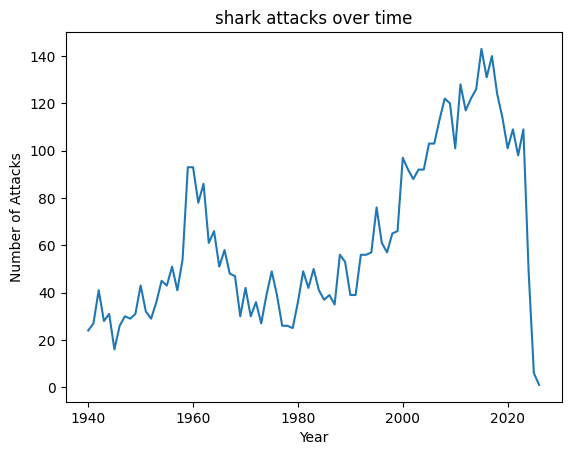

In [45]:
dfs_filtered['Year'].value_counts().sort_index().plot(kind='line', title="shark attacks over time")
plt.xlabel("year")
plt.ylabel("number of attacks")
plt.show()

<font color="lightgreen">As shown by the graph, the number of shark attacks reported are increasing from 1940. It first peaked at 1960, and was followed by a second peak at around 2010 with incremental reports pf shark attacks for decades. </font>

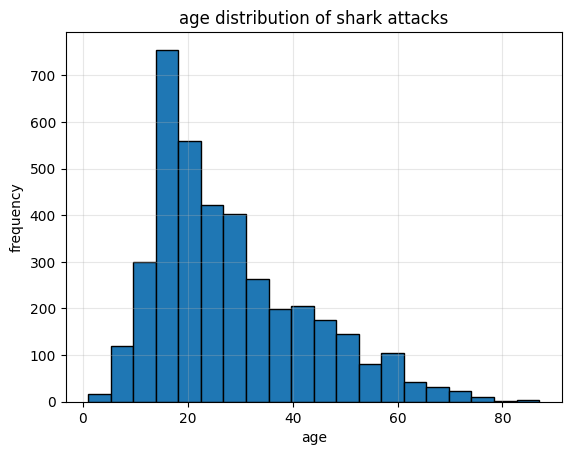

In [69]:
# 4
dfs['Age'] = pd.to_numeric(dfs['Age'], errors='coerce')
dfs.dropna(subset=['Age'], inplace=True)
plt.hist(dfs['Age'], bins=20, edgecolor='black')
plt.grid(True, alpha=0.3)
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('age distribution of shark attacks')
plt.show()

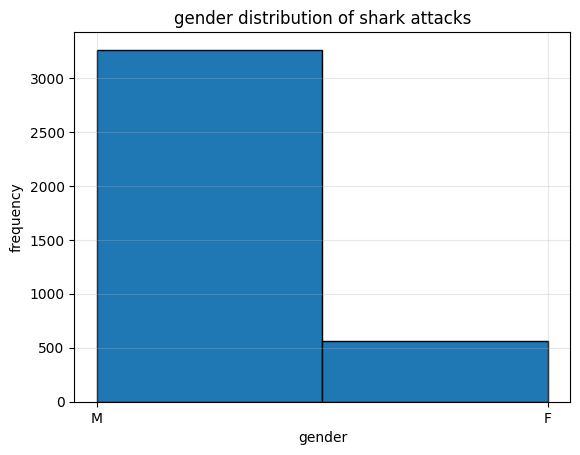

Proportion of male being victims of attacks are: 85.28 %


In [98]:
# 5
dfs['Sex'].value_counts()
dfs['Sex'].str.strip().str.upper()
dfs['Sex'] = dfs['Sex'].replace({'lli':np.nan, 'M':'M'})
dfs['Sex'] = dfs['Sex'].where(dfs['Sex'].isin(['M', 'F']), np.nan)
dfs = dfs.dropna(subset=['Sex'])
dfs['Sex'].isnull().sum()
plt.hist(dfs['Sex'], bins = 2, edgecolor='black')
plt.grid(True, alpha=0.3)
plt.xlabel('gender')
plt.ylabel('frequency')
plt.title('gender distribution of shark attacks')
plt.show()

prop_male = (dfs['Sex'] == 'M').mean()
print("Percentage of male being victims of attacks are:", round(prop_male*100,2), '%')

In [107]:
# 6
dfs['Type'].isna().sum()
dfs = dfs.dropna(subset=['Type'])
dfs['Type'].value_counts()
type_replacement = {
    'Boat':'Unknown',
    'Boatomg':'Unknown',
    'Boating':'Unknown',
    'Sea Disaster':'Unknown',
    'Questionable': 'Unknown',
    'Unconfirmed': 'Unknown',
    'Unverified': 'Unknown',
    'Under investigation': 'Unknown',
    'Invalid': 'Unknown',
    'UNKNOWN':'Unknown',
    '?':'Unknown'
}

dfs['Type'] = dfs['Type'].replace(type_replacement)
dfs['Type'].value_counts()
prob_unprovoked = (dfs['Type'] == 'Unprovoked').mean()
print("Proportion of attacks that are unprovoked are:", round(prob_unprovoked*100,2), '%')

Proportion of attacks that are unprovoked are: 89.25 %


In [115]:
dfs['Fatal Y/N'].value_counts()

,count
Fatal Y/N,
N,2896
Y,649
UNKNOWN,8
N,6
F,2
M,1
2017,1


In [124]:
# 7
dfs['Fatal Y/N'].value_counts()
dfs['Fatal Y/N'].isnull().sum()
dfs = dfs.dropna(subset=['Fatal Y/N'])
dfs['Fatal Y/N'].isnull().sum()

replacement = {
    'N':'N',
    'Y':'Y',
    'M':'Unknown',
    '2017':'Unknown',
    'UNKNOWN':'Unknown',
    ' N':'N',
    ' N ':'N',
    'F':'Unknown',
    2017: 'Unknown'
}

dfs['Fatal Y/N'] = dfs['Fatal Y/N'].replace(replacement)
dfs['Fatal Y/N'].value_counts()

,count
Fatal Y/N,
N,2902
Y,649
Unknown,12


Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

In [126]:
# 8
# Are sharks more likely to launch unprovoked attacks on men or women?
pd.crosstab(dfs['Sex'], dfs['Type'])


Type,Provoked,Unknown,Unprovoked
Sex,,,
F,21,9,488
M,280,73,2692


<font color='lightgreen'>Sharks are more likely to launch unprovoked attacks on men :(</font>

In [131]:
# Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?
print(pd.crosstab(dfs['Type'], dfs['Fatal Y/N']))
fatality_unprovoked = (621/2549)*100
fatality_provoked = (8/291)*100
if fatality_unprovoked > fatality_provoked:
  print("When the attack is unprovoked, it is more likely to be fatal, given that fatal unprovoked attacks have a fatality percentage of:", round(fatality_unprovoked, 2), '%' )
elif fatality_unprovoked < fatality_provoked:
  print("When the attack is provoked, it is more likely to be fatal, given that fatal provoked attacks have a fatality percentage of:", round(fatality_provoked, 2), '%' )

Fatal Y/N      N  Unknown    Y
Type                          
Provoked     291        2    8
Unknown       62        0   20
Unprovoked  2549       10  621
When the attack is unprovoked, it is more likely to be fatal, given that fatal unprovoked attacks have a fatality percentage of: 24.36 %


<font color='lightgreen'>Attacks are more fatal when unprovoked</font>

In [133]:
# Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
pd.crosstab(dfs['Sex'], dfs['Fatal Y/N'])
fatality_men = (570/2464)*100
fatality_women = (79/438)*100
if fatality_men > fatality_women:
  print("It is more likely to be fatal when the victim is male, given a fatality percentage of:", round(fatality_men, 2), '%')
elif fatality_men < fatality_women:
  print('It is more likely to be fatal when the victim is female, given a fatality percentage of:', round(fatality_women, 2), '%')


It is more likely to be fatal when the victim is male, given a fatality percentage of: 23.13 %


<font color='lightgreen'> When the victim is male, it is often more fatal. I feel like sharks are either</font> <font color='red'> sexist </font> <font color='lightgreen'>or perhaps there's a larger sample size of male swimmers/divers who engages more frequently with sharks in the ocean</font>

In [144]:
# 9
dfs.columns
dfs.rename(columns={'Species ': 'Species'}, inplace=True)
dfs['Species'] = dfs['Species'].str.lower()
white_shark_proportion = dfs['Species'].str.contains('white shark', na=False).mean()
print("Proportion of attacks by white sharks are:", round(white_shark_proportion*100,2), '%')

Proportion of attacks by white sharks are: 12.88 %
